# Prediction of COVID-19 project

Import libraries

In [18]:
from datetime import datetime

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

print("Libraries imported")

Libraries imported


In [7]:
# Import data to this project
url = "https://github.com/hadirga/dio-creating-ml-models-to-predict-covid19-evolution/blob/309b6d99c41cff772d1ca03283f2114082d7546d/datasets/covid_19_data.csv?raw=true"
df = pd.read_csv(url, parse_dates=["ObservationDate", "Last Update"])
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [3]:
# Check datatypes of each column
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

Clean the column names, removing capital letters and special characters. 

In [8]:
# create a function clean the column names
import re

def clean_column_name(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

clean_column_name("Covid/19 DataSet") # testing function

'covid19dataset'

In [9]:
# clean all the columns names
df.columns = [clean_column_name(col) for col in df.columns]
df.columns

Index(['sno', 'observationdate', 'provincestate', 'countryregion',
       'lastupdate', 'confirmed', 'deaths', 'recovered'],
      dtype='object')

# Brazil

Select only the data from Brazil

In [14]:
df.countryregion.unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal

In [13]:
df.loc[df.countryregion == "Brazil"]

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
84,85,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2525,2526,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2631,2632,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2742,2743,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2852,2853,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306272,306273,2021-05-29,Roraima,Brazil,2021-05-30 04:20:55,103222.0,1635.0,96188.0
306290,306291,2021-05-29,Santa Catarina,Brazil,2021-05-30 04:20:55,965277.0,15174.0,921496.0
306292,306293,2021-05-29,Sao Paulo,Brazil,2021-05-30 04:20:55,3254893.0,111123.0,2895697.0
306298,306299,2021-05-29,Sergipe,Brazil,2021-05-30 04:20:55,233932.0,5054.0,208146.0


In [56]:
brazil_df = df.loc[(df.countryregion == "Brazil") & (df.confirmed > 0)]
brazil_df = brazil_df.groupby(by=["observationdate"], as_index=False)["confirmed", "deaths", "recovered"].sum()
brazil_df.head(10)

/tmp/ipykernel_8151/2087089121.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,observationdate,confirmed,deaths,recovered
0,2020-02-26,1.0,0.0,0.0
1,2020-02-27,1.0,0.0,0.0
2,2020-02-28,1.0,0.0,0.0
3,2020-02-29,2.0,0.0,0.0
4,2020-03-01,2.0,0.0,0.0
5,2020-03-02,2.0,0.0,0.0
6,2020-03-03,2.0,0.0,0.0
7,2020-03-04,4.0,0.0,0.0
8,2020-03-05,4.0,0.0,0.0
9,2020-03-06,13.0,0.0,0.0


# Confirmed cases

In [55]:
# Graph of the evolution of confirmed cases
px.line(brazil_df, "observationdate", "confirmed", title="Confirmed cases in Brazil")

# New cases per day

In [61]:
# Functional programming techinque
brazil_df["newcases"] = list(map(
    lambda x: 0 if x==0 else brazil_df["confirmed"].iloc[x] - brazil_df["confirmed"].iloc[x-1],
    np.arange(brazil_df.shape[0])
))
brazil_df

,observationdate,confirmed,deaths,recovered,newcases
0,2020-02-26,1.0,0.0,0.0,0.0
1,2020-02-27,1.0,0.0,0.0,0.0
2,2020-02-28,1.0,0.0,0.0,0.0
3,2020-02-29,2.0,0.0,0.0,1.0
4,2020-03-01,2.0,0.0,0.0,0.0
...,...,...,...,...,...
454,2021-05-25,16194209.0,452031.0,14231991.0,73453.0
455,2021-05-26,16274695.0,454429.0,14272174.0,80486.0
456,2021-05-27,16342162.0,456674.0,14455810.0,67467.0
457,2021-05-28,16391930.0,459045.0,14492701.0,49768.0


In [62]:
# Visualize new cases
px.line(brazil_df, x="observationdate", y="newcases", title="New cases per day")

# Deaths

In [70]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=brazil_df.observationdate, y=brazil_df.deaths, name="Deaths", mode="lines+markers", line={"color": "red"})
)
fig.update_layout(title="COVID-19 Deaths in Brazil")
fig.show()

# Growth rate

$growth\_rate = (present / past)^{1/n} - 1$

In [75]:
def growth_rate(data, variable, begin_date=None, end_date=None):
    # Take first available date
    if begin_date is None:
        begin_date = data.observationdate.loc[data[variable]>0].min()
    else:
        begin_date = pd.to_datetime(begin_date)

    if end_date is None:
        end_date = data.observationdate.iloc[-1]
    else:
        end_date = pd.to_datetime(end_date)

    # define present and past values
    past = data.loc[data.observationdate == begin_date, variable].values[0]
    present = data.loc[data.observationdate == end_date, variable].values[0]

    # define number of points
    n_value = (end_date - begin_date).days

    # calculate growth rate
    g_rate = (present / past)**(1/n_value) - 1

    return g_rate * 100

In [79]:
# Growth rate average of COVID-19 in a period of time
growth_rate(brazil_df, "confirmed", "2020-02-26", "2020-05-19")

16.27183353112116

In [80]:
def growth_rate_daily(data, variable, begin_date=None):
    # Take first available date
    if begin_date is None:
        begin_date = data.observationdate.loc[data[variable]>0].min()
    else:
        begin_date = pd.to_datetime(begin_date)

    end_date = data.observationdate.max()

    # define present and past values
    past = data.loc[data.observationdate == begin_date, variable].values[0]
    present = data.loc[data.observationdate == end_date, variable].values[0]

    # define number of points
    n_value = (end_date - begin_date).days

    # calculate growth rate
    rates = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1, n_value+1)
    ))

    return np.array(rates) * 100

In [84]:
g_rates_daily = growth_rate_daily(brazil_df, "confirmed")
first_day = brazil_df.observationdate[brazil_df.confirmed > 0].min()
last_day = brazil_df.observationdate.max()

px.line(x=pd.date_range(first_day, last_day)[1:], y=g_rates_daily, title="Daily growth rate of confirmed cases")

# Predictions

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

confirmed_df = brazil_df.confirmed
confirmed_df.index = brazil_df.observationdate
confirmed_df

observationdate
2020-02-26           1.0
2020-02-27           1.0
2020-02-28           1.0
2020-02-29           2.0
2020-03-01           2.0
                 ...    
2021-05-25    16194209.0
2021-05-26    16274695.0
2021-05-27    16342162.0
2021-05-28    16391930.0
2021-05-29    16471600.0
Name: confirmed, Length: 459, dtype: float64

In [90]:
res = seasonal_decompose(confirmed_df)

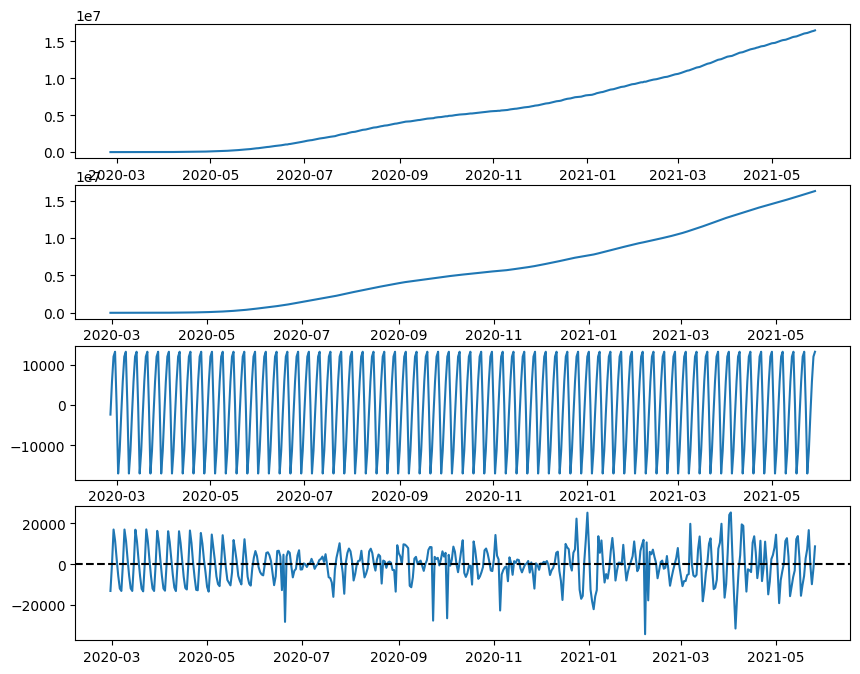

In [98]:
fit, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmed_df.index, res.resid)
ax4.axhline(0, linestyle="dashed", c="black")
plt.show()